# item_nbr의 판매 정보들 ( 판매 된 것만 추출한 데이터 ) 을 통해 station 기준으로 나누고 각 station별 어떤 item_nbr이 잘 판매되는지를 알아보자

In [1]:
import set_math
%matplotlib inline

success import scipy
success import pandas
success import numpy
success import sympy
success import matplotlib.pyplot
Hangul OK in your MAC !!!


In [2]:
tmp_df = pd.read_csv('../data/03. item_nbr_info.csv', index_col = 0)
tmp_df.tail()

,date,station_nbr,store_nbr,item_nbr,units,depart,codesum
118691,2014-10-31,19,30,16,19,-6,RA SN
118692,2014-10-31,19,30,44,69,-6,RA SN
118693,2014-10-31,19,30,65,1,-6,RA SN
118694,2014-10-31,20,17,9,24,M,
118695,2014-10-31,20,17,37,25,M,


In [3]:
def make_year(date):
    return int(date.split('-')[0])

def make_month(date):
    return int(date.split('-')[1])

def make_day(date):
    return int(date.split('-')[2])

In [4]:
tmp_df['year'] = tmp_df['date'].apply(make_year)
tmp_df['month'] = tmp_df['date'].apply(make_month)
tmp_df['day'] = tmp_df['date'].apply(make_day)

## outlier 제거

In [5]:
tmp_df[tmp_df['units'] > 3000]

,date,station_nbr,store_nbr,item_nbr,units,depart,codesum,year,month,day
42763,2012-11-15,13,37,5,5568,M,,2012,11,15
84317,2013-11-21,13,37,5,3369,M,SN BR,2013,11,21


In [6]:
tmp_df.drop(42763, inplace = True)
tmp_df.drop(84317, inplace = True)

In [7]:
tmp_df = tmp_df.reset_index(drop = True)
tmp_df.tail()

,date,station_nbr,store_nbr,item_nbr,units,depart,codesum,year,month,day
118689,2014-10-31,19,30,16,19,-6,RA SN,2014,10,31
118690,2014-10-31,19,30,44,69,-6,RA SN,2014,10,31
118691,2014-10-31,19,30,65,1,-6,RA SN,2014,10,31
118692,2014-10-31,20,17,9,24,M,,2014,10,31
118693,2014-10-31,20,17,37,25,M,,2014,10,31


# about station_1 - store_nbr 1

In [8]:
station_1 = tmp_df[tmp_df['station_nbr'].isin([1])]

In [9]:
station_1.tail()

,date,station_nbr,store_nbr,item_nbr,units,depart,codesum,year,month,day
118468,2014-10-30,1,1,47,4,M,,2014,10,30
118577,2014-10-31,1,1,9,28,M,,2014,10,31
118578,2014-10-31,1,1,28,4,M,,2014,10,31
118579,2014-10-31,1,1,47,1,M,,2014,10,31
118580,2014-10-31,1,1,51,3,M,,2014,10,31


In [10]:
station_1_2012 = station_1[station_1['year'].isin([2012])].reset_index(drop = True)
station_1_2013 = station_1[station_1['year'].isin([2013])].reset_index(drop = True)
station_1_2014 = station_1[station_1['year'].isin([2014])].reset_index(drop = True)

In [11]:
tmp_pivot_2012 = station_1_2012.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2013 = station_1_2013.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2014 = station_1_2014.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)

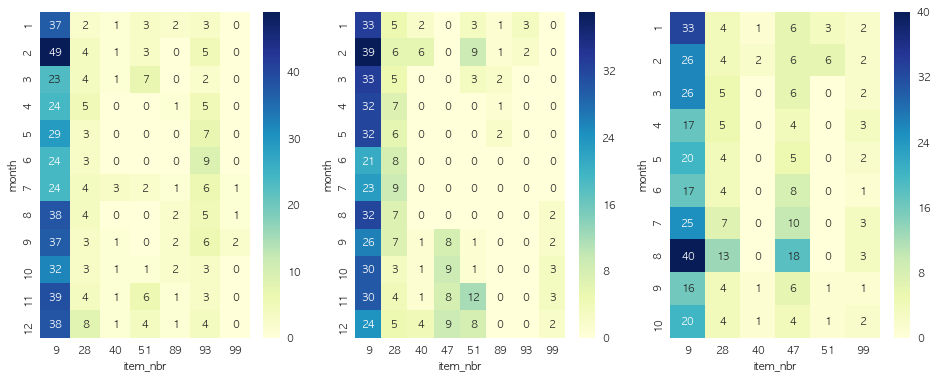

In [12]:
plt.figure(figsize = (16,6))
plt.subplot(131)
sns.heatmap(tmp_pivot_2012, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(132)
sns.heatmap(tmp_pivot_2013, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(133)
sns.heatmap(tmp_pivot_2014, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.show()

# about station_2  - store_nbr 16

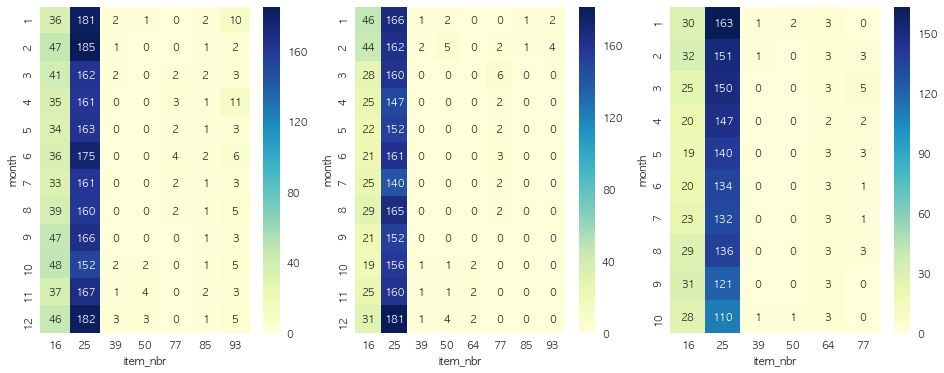

In [13]:
station_2 = tmp_df[tmp_df['station_nbr'].isin([2])].reset_index(drop = True)

station_2_2012 = station_2[station_2['year'].isin([2012])].reset_index(drop = True)
station_2_2013 = station_2[station_2['year'].isin([2013])].reset_index(drop = True)
station_2_2014 = station_2[station_2['year'].isin([2014])].reset_index(drop = True)

tmp_pivot_2012 = station_2_2012.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2013 = station_2_2013.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2014 = station_2_2014.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)

plt.figure(figsize = (16,6))
plt.subplot(131)
sns.heatmap(tmp_pivot_2012, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(132)
sns.heatmap(tmp_pivot_2013, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(133)
sns.heatmap(tmp_pivot_2014, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.show()

# about station_3 - store_nbr 21, 29, 30

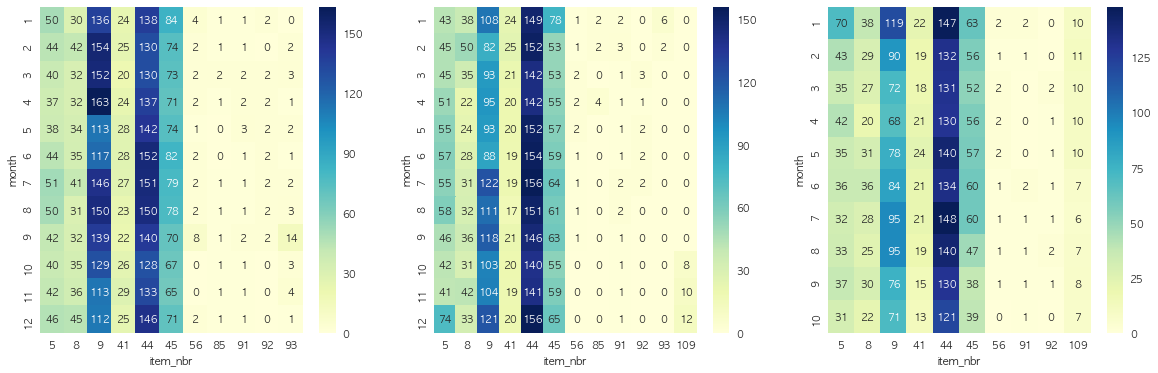

In [14]:
station_3 = tmp_df[tmp_df['station_nbr'].isin([3])]

station_3_2012 = station_3[station_3['year'].isin([2012])].reset_index(drop = True)
station_3_2013 = station_3[station_3['year'].isin([2013])].reset_index(drop = True)
station_3_2014 = station_3[station_3['year'].isin([2014])].reset_index(drop = True)

tmp_pivot_2012 = station_3_2012.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2013 = station_3_2013.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2014 = station_3_2014.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)

plt.figure(figsize = (20,6))
plt.subplot(131)
sns.heatmap(tmp_pivot_2012, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(132)
sns.heatmap(tmp_pivot_2013, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(133)
sns.heatmap(tmp_pivot_2014, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.show()

# about station_4 - store_nbr 8

[8]


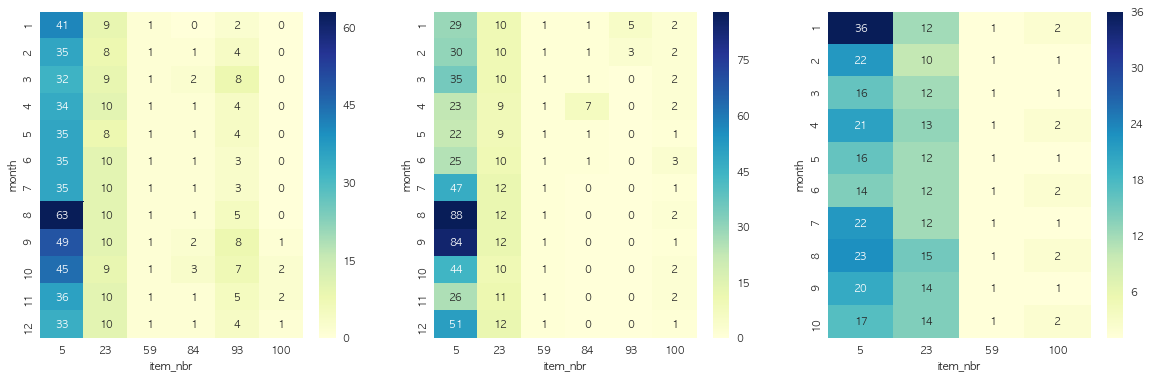

In [15]:
station_4 = tmp_df[tmp_df['station_nbr'].isin([4])]

station_4_2012 = station_4[station_4['year'].isin([2012])].reset_index(drop = True)
station_4_2013 = station_4[station_4['year'].isin([2013])].reset_index(drop = True)
station_4_2014 = station_4[station_4['year'].isin([2014])].reset_index(drop = True)

tmp_pivot_2012 = station_4_2012.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2013 = station_4_2013.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2014 = station_4_2014.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)

print(station_4['store_nbr'].unique())
plt.figure(figsize = (20,6))
plt.subplot(131)
sns.heatmap(tmp_pivot_2012, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(132)
sns.heatmap(tmp_pivot_2013, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(133)
sns.heatmap(tmp_pivot_2014, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.show()

# about station_5 - store_nbr 35

[35]


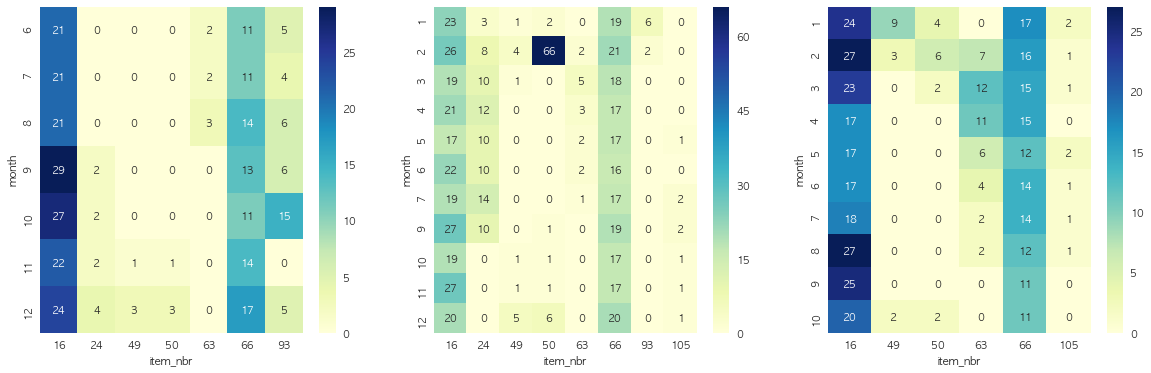

In [16]:
station_5 = tmp_df[tmp_df['station_nbr'].isin([5])]

station_5_2012 = station_5[station_5['year'].isin([2012])].reset_index(drop = True)
station_5_2013 = station_5[station_5['year'].isin([2013])].reset_index(drop = True)
station_5_2014 = station_5[station_5['year'].isin([2014])].reset_index(drop = True)

tmp_pivot_2012 = station_5_2012.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2013 = station_5_2013.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2014 = station_5_2014.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)

print(station_5['store_nbr'].unique())
plt.figure(figsize = (20,6))
plt.subplot(131)
sns.heatmap(tmp_pivot_2012, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(132)
sns.heatmap(tmp_pivot_2013, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(133)
sns.heatmap(tmp_pivot_2014, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.show()

# about station_6 - store_nbr 7, 13

[ 7 13]


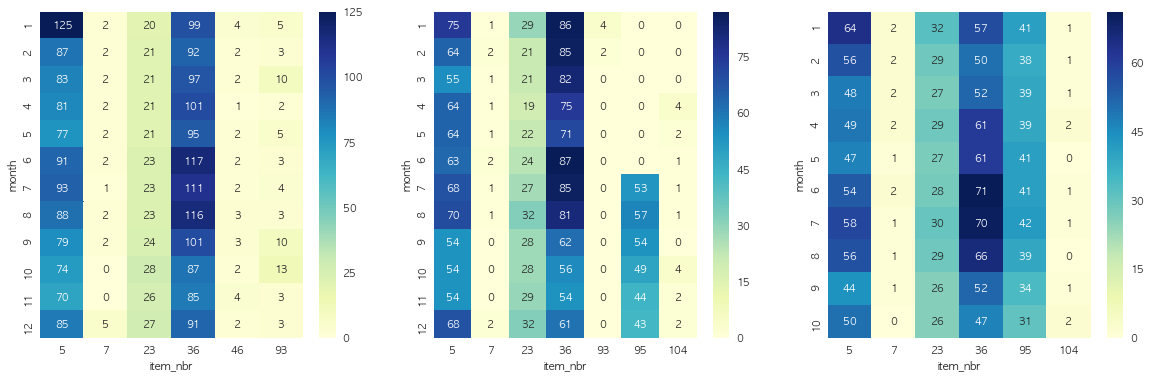

In [17]:
station_6 = tmp_df[tmp_df['station_nbr'].isin([6])]

station_6_2012 = station_6[station_6['year'].isin([2012])].reset_index(drop = True)
station_6_2013 = station_6[station_6['year'].isin([2013])].reset_index(drop = True)
station_6_2014 = station_6[station_6['year'].isin([2014])].reset_index(drop = True)

tmp_pivot_2012 = station_6_2012.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2013 = station_6_2013.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2014 = station_6_2014.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)

print(station_6['store_nbr'].unique())
plt.figure(figsize = (20,6))
plt.subplot(131)
sns.heatmap(tmp_pivot_2012, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(132)
sns.heatmap(tmp_pivot_2013, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(133)
sns.heatmap(tmp_pivot_2014, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.show()

# about station_7 - store_nbr 3, 20, 28

[ 3 20 28]


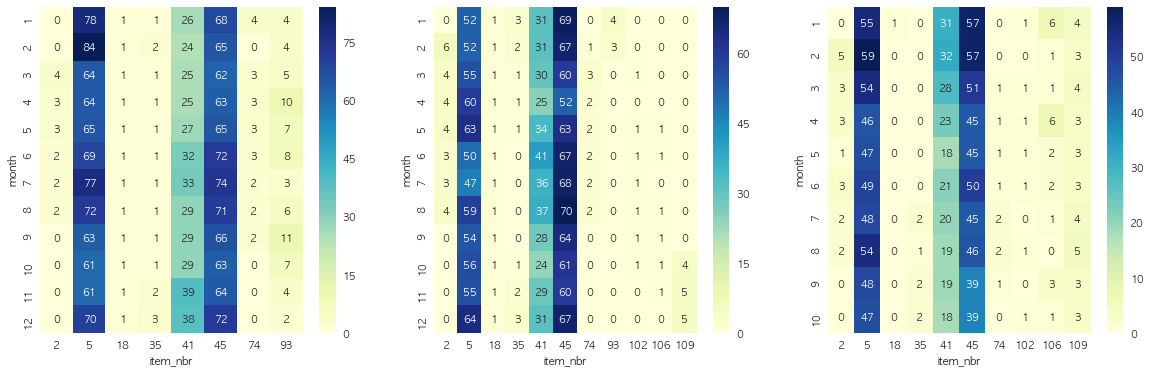

In [18]:
station_7 = tmp_df[tmp_df['station_nbr'].isin([7])]

station_7_2012 = station_7[station_7['year'].isin([2012])].reset_index(drop = True)
station_7_2013 = station_7[station_7['year'].isin([2013])].reset_index(drop = True)
station_7_2014 = station_7[station_7['year'].isin([2014])].reset_index(drop = True)

tmp_pivot_2012 = station_7_2012.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2013 = station_7_2013.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2014 = station_7_2014.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)

print(station_7['store_nbr'].unique())
plt.figure(figsize = (20,6))
plt.subplot(131)
sns.heatmap(tmp_pivot_2012, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(132)
sns.heatmap(tmp_pivot_2013, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(133)
sns.heatmap(tmp_pivot_2014, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.show()

# about station_8 - store_nbr 39

[39]


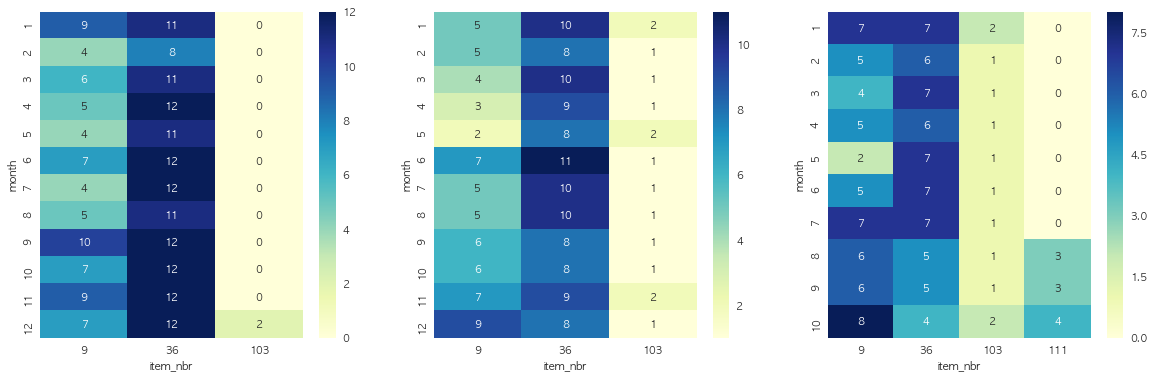

In [19]:
station_8 = tmp_df[tmp_df['station_nbr'].isin([8])]

station_8_2012 = station_8[station_8['year'].isin([2012])].reset_index(drop = True)
station_8_2013 = station_8[station_8['year'].isin([2013])].reset_index(drop = True)
station_8_2014 = station_8[station_8['year'].isin([2014])].reset_index(drop = True)

tmp_pivot_2012 = station_8_2012.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2013 = station_8_2013.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2014 = station_8_2014.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)

print(station_8['store_nbr'].unique())
plt.figure(figsize = (20,6))
plt.subplot(131)
sns.heatmap(tmp_pivot_2012, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(132)
sns.heatmap(tmp_pivot_2013, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(133)
sns.heatmap(tmp_pivot_2014, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.show()

# about station_9 - store_nbr 4, 24

[ 4 24]


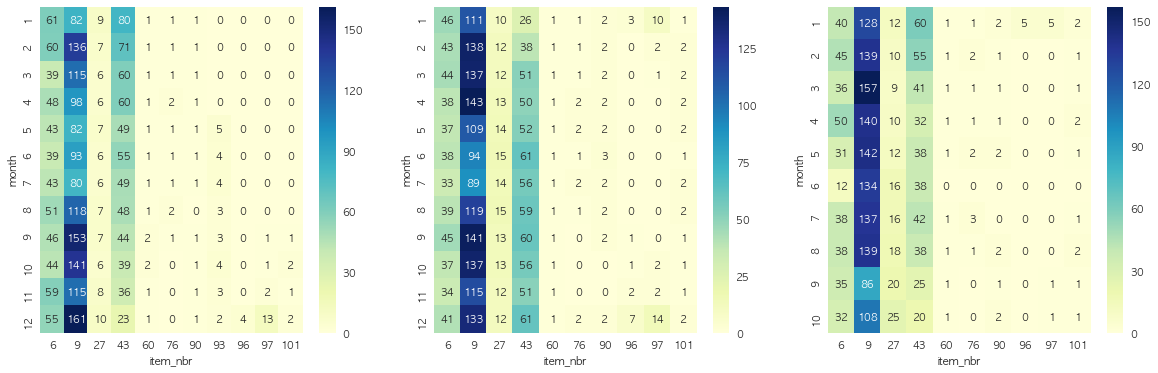

In [20]:
station_9 = tmp_df[tmp_df['station_nbr'].isin([9])]

station_9_2012 = station_9[station_9['year'].isin([2012])].reset_index(drop = True)
station_9_2013 = station_9[station_9['year'].isin([2013])].reset_index(drop = True)
station_9_2014 = station_9[station_9['year'].isin([2014])].reset_index(drop = True)

tmp_pivot_2012 = station_9_2012.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2013 = station_9_2013.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2014 = station_9_2014.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)

print(station_9['store_nbr'].unique())
plt.figure(figsize = (20,6))
plt.subplot(131)
sns.heatmap(tmp_pivot_2012, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(132)
sns.heatmap(tmp_pivot_2013, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(133)
sns.heatmap(tmp_pivot_2014, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.show()

# about station_10 - store_nbr 11, 22, 27

[11 22 27]


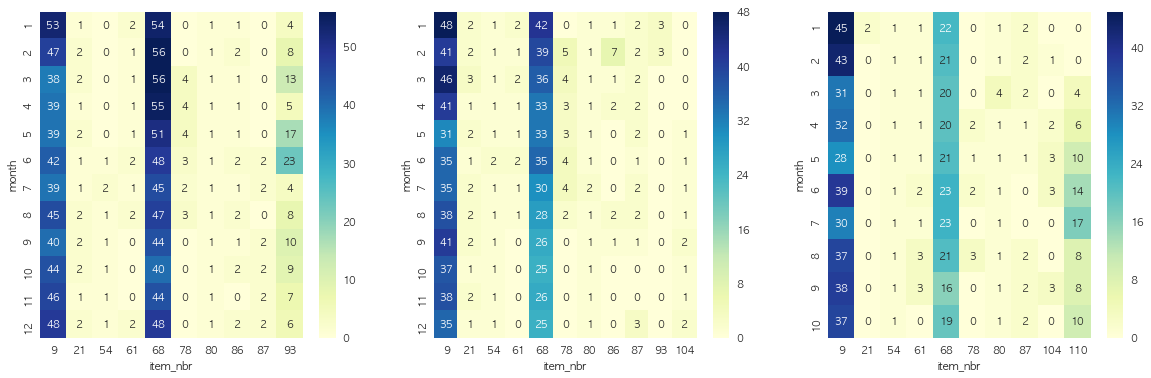

In [21]:
station_10 = tmp_df[tmp_df['station_nbr'].isin([10])]

station_10_2012 = station_10[station_10['year'].isin([2012])].reset_index(drop = True)
station_10_2013 = station_10[station_10['year'].isin([2013])].reset_index(drop = True)
station_10_2014 = station_10[station_10['year'].isin([2014])].reset_index(drop = True)

tmp_pivot_2012 = station_10_2012.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2013 = station_10_2013.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2014 = station_10_2014.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)

print(station_10['store_nbr'].unique())
plt.figure(figsize = (20,6))
plt.subplot(131)
sns.heatmap(tmp_pivot_2012, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(132)
sns.heatmap(tmp_pivot_2013, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(133)
sns.heatmap(tmp_pivot_2014, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.show()

# about station_11 - store_nbr 12, 43

[12 43]


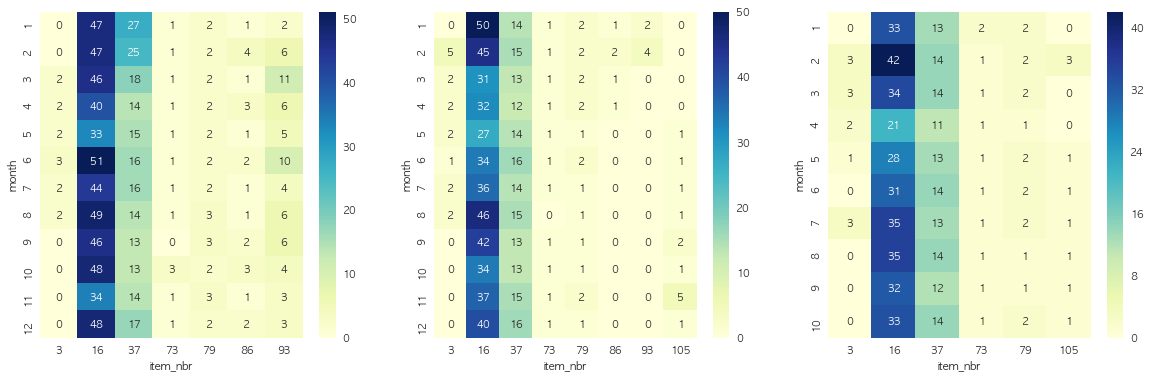

In [22]:
station_11 = tmp_df[tmp_df['station_nbr'].isin([11])]

station_11_2012 = station_11[station_11['year'].isin([2012])].reset_index(drop = True)
station_11_2013 = station_11[station_11['year'].isin([2013])].reset_index(drop = True)
station_11_2014 = station_11[station_11['year'].isin([2014])].reset_index(drop = True)

tmp_pivot_2012 = station_11_2012.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2013 = station_11_2013.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2014 = station_11_2014.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)

print(station_11['store_nbr'].unique())
plt.figure(figsize = (20,6))
plt.subplot(131)
sns.heatmap(tmp_pivot_2012, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(132)
sns.heatmap(tmp_pivot_2013, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(133)
sns.heatmap(tmp_pivot_2014, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.show()

# about station_12 - store_nbr 5, 10, 41, 44

[ 5 10 41 44]


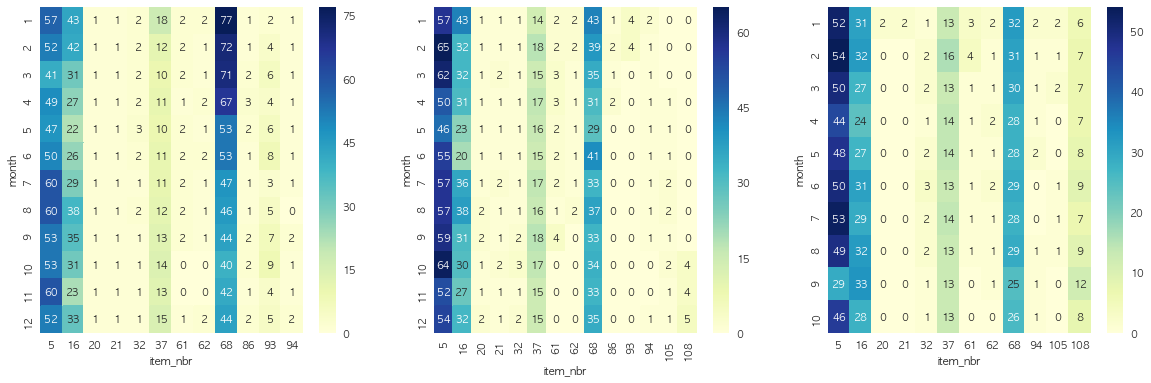

In [23]:
station_12 = tmp_df[tmp_df['station_nbr'].isin([12])]

station_12_2012 = station_12[station_12['year'].isin([2012])].reset_index(drop = True)
station_12_2013 = station_12[station_12['year'].isin([2013])].reset_index(drop = True)
station_12_2014 = station_12[station_12['year'].isin([2014])].reset_index(drop = True)

tmp_pivot_2012 = station_12_2012.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2013 = station_12_2013.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2014 = station_12_2014.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)

print(station_12['store_nbr'].unique())
plt.figure(figsize = (20,6))
plt.subplot(131)
sns.heatmap(tmp_pivot_2012, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(132)
sns.heatmap(tmp_pivot_2013, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(133)
sns.heatmap(tmp_pivot_2014, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.show()

# about station_13 - store_nbr 15, 25, 32, 37, 40

[15 25 32 37 40]


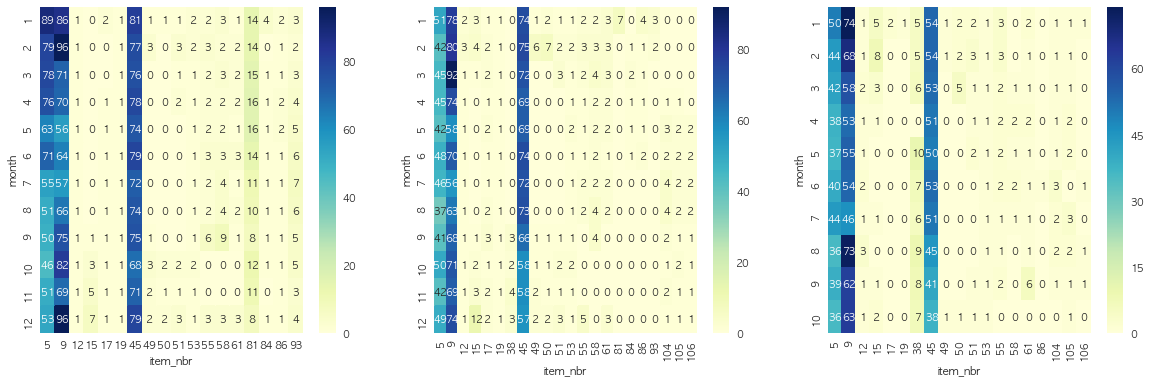

In [24]:
station_13 = tmp_df[tmp_df['station_nbr'].isin([13])]

station_13_2012 = station_13[station_13['year'].isin([2012])].reset_index(drop = True)
station_13_2013 = station_13[station_13['year'].isin([2013])].reset_index(drop = True)
station_13_2014 = station_13[station_13['year'].isin([2014])].reset_index(drop = True)

tmp_pivot_2012 = station_13_2012.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2013 = station_13_2013.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2014 = station_13_2014.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)

print(station_13['store_nbr'].unique())
plt.figure(figsize = (20,6))
plt.subplot(131)
sns.heatmap(tmp_pivot_2012, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(132)
sns.heatmap(tmp_pivot_2013, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(133)
sns.heatmap(tmp_pivot_2014, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.show()

# about station_14 - store_nbr 2, 6, 38, 42

[ 2  6 38 42]


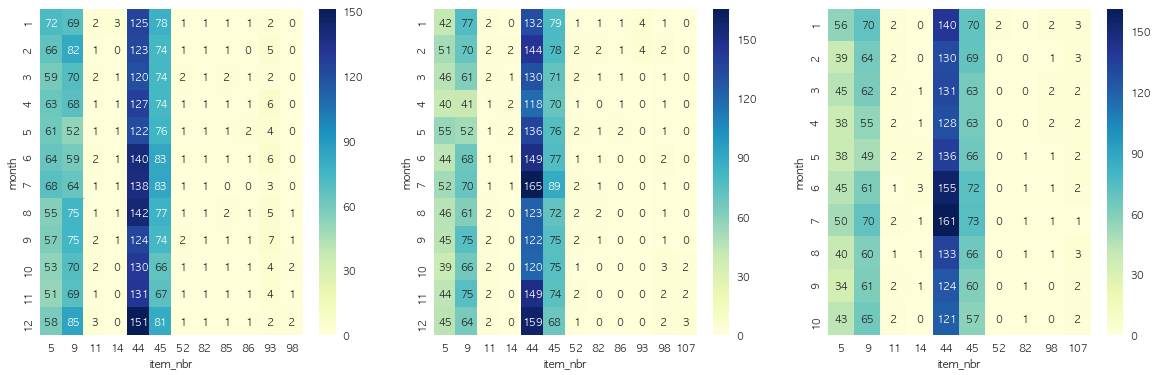

In [25]:
station_14 = tmp_df[tmp_df['station_nbr'].isin([14])]

station_14_2012 = station_14[station_14['year'].isin([2012])].reset_index(drop = True)
station_14_2013 = station_14[station_14['year'].isin([2013])].reset_index(drop = True)
station_14_2014 = station_14[station_14['year'].isin([2014])].reset_index(drop = True)

tmp_pivot_2012 = station_14_2012.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2013 = station_14_2013.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2014 = station_14_2014.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)

print(station_14['store_nbr'].unique())
plt.figure(figsize = (20,6))
plt.subplot(131)
sns.heatmap(tmp_pivot_2012, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(132)
sns.heatmap(tmp_pivot_2013, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(133)
sns.heatmap(tmp_pivot_2014, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.show()

# about station_15 - store_nbr 19

[19]


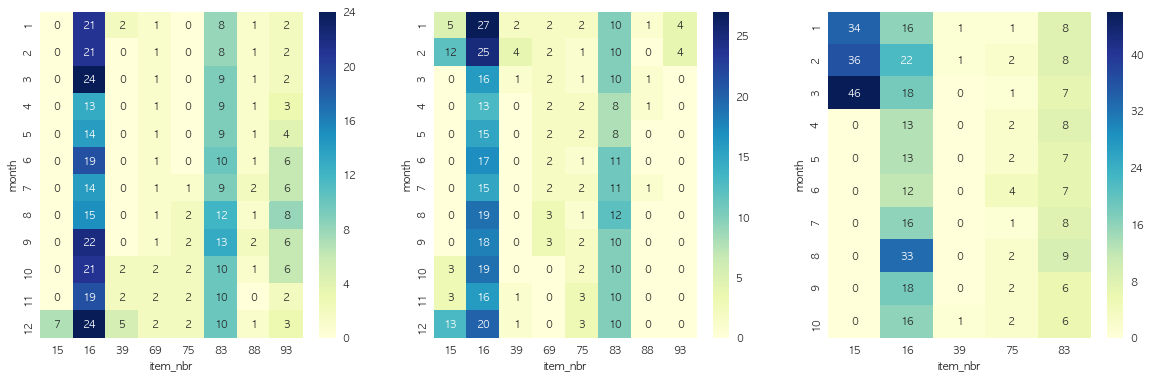

In [26]:
station_15 = tmp_df[tmp_df['station_nbr'].isin([15])]

station_15_2012 = station_15[station_15['year'].isin([2012])].reset_index(drop = True)
station_15_2013 = station_15[station_15['year'].isin([2013])].reset_index(drop = True)
station_15_2014 = station_15[station_15['year'].isin([2014])].reset_index(drop = True)

tmp_pivot_2012 = station_15_2012.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2013 = station_15_2013.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2014 = station_15_2014.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)

print(station_15['store_nbr'].unique())
plt.figure(figsize = (20,6))
plt.subplot(131)
sns.heatmap(tmp_pivot_2012, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(132)
sns.heatmap(tmp_pivot_2013, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(133)
sns.heatmap(tmp_pivot_2014, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.show()

# about station_16 - store_nbr 14, 45

[14 45]


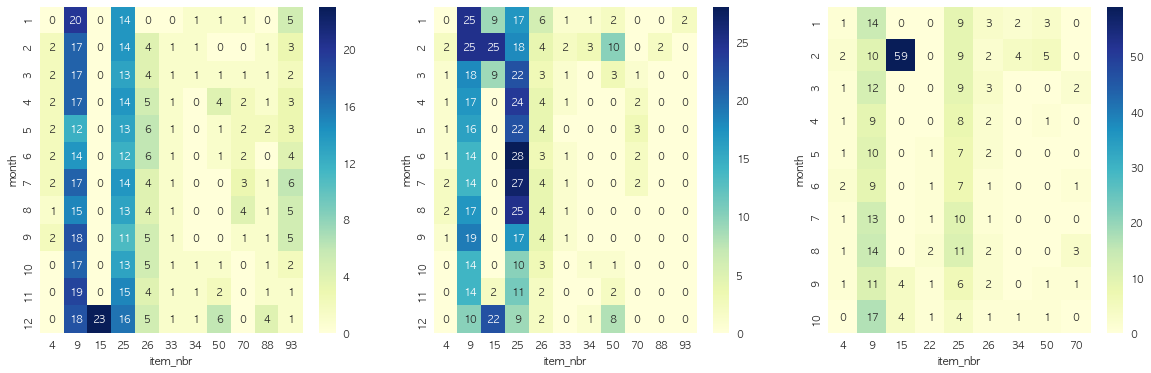

In [27]:
station_16 = tmp_df[tmp_df['station_nbr'].isin([16])]

station_16_2012 = station_16[station_16['year'].isin([2012])].reset_index(drop = True)
station_16_2013 = station_16[station_16['year'].isin([2013])].reset_index(drop = True)
station_16_2014 = station_16[station_16['year'].isin([2014])].reset_index(drop = True)

tmp_pivot_2012 = station_16_2012.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2013 = station_16_2013.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2014 = station_16_2014.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)

print(station_16['store_nbr'].unique())
plt.figure(figsize = (20,6))
plt.subplot(131)
sns.heatmap(tmp_pivot_2012, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(132)
sns.heatmap(tmp_pivot_2013, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(133)
sns.heatmap(tmp_pivot_2014, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.show()

# about station_17 - store_nbr 9, 18, 23, 26, 31, 34

[ 9 18 23 26 31 34]


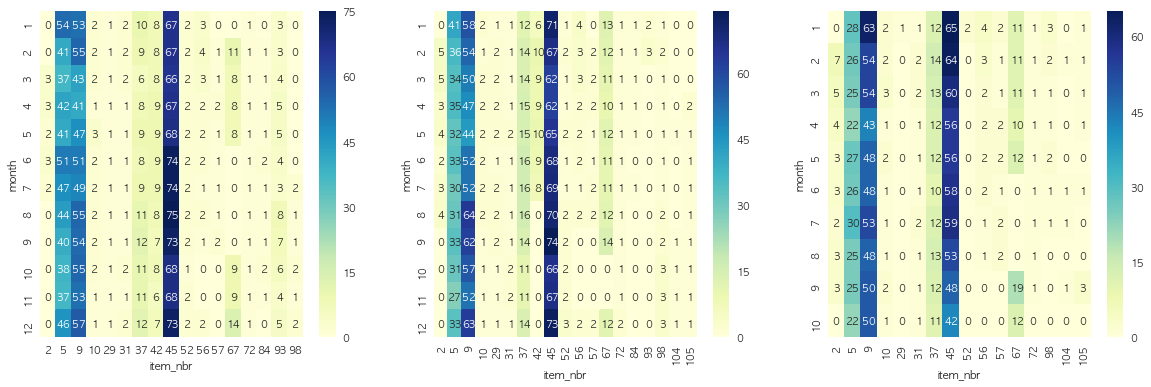

In [28]:
station_17 = tmp_df[tmp_df['station_nbr'].isin([17])]

station_17_2012 = station_17[station_17['year'].isin([2012])].reset_index(drop = True)
station_17_2013 = station_17[station_17['year'].isin([2013])].reset_index(drop = True)
station_17_2014 = station_17[station_17['year'].isin([2014])].reset_index(drop = True)

tmp_pivot_2012 = station_17_2012.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2013 = station_17_2013.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2014 = station_17_2014.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)

print(station_17['store_nbr'].unique())
plt.figure(figsize = (20,6))
plt.subplot(131)
sns.heatmap(tmp_pivot_2012, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(132)
sns.heatmap(tmp_pivot_2013, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(133)
sns.heatmap(tmp_pivot_2014, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.show()

# about station_18 - store_nbr 36

[36]


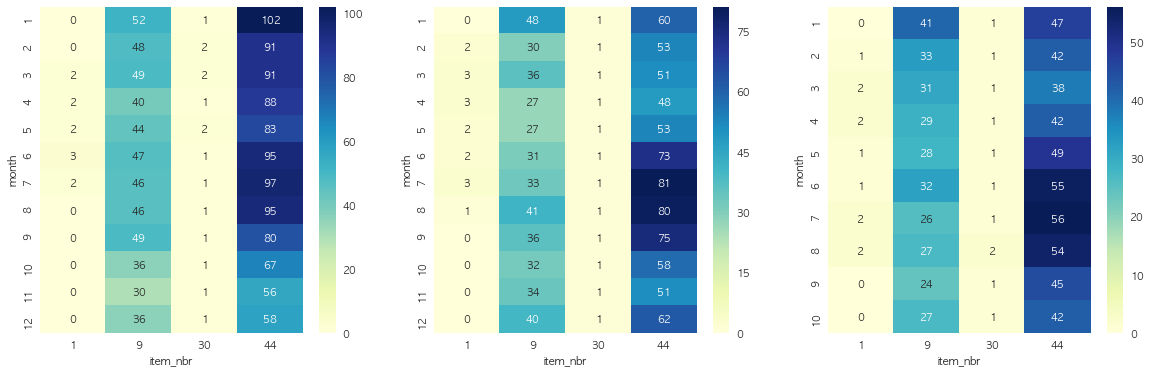

In [29]:
station_18 = tmp_df[tmp_df['station_nbr'].isin([18])]

station_18_2012 = station_18[station_18['year'].isin([2012])].reset_index(drop = True)
station_18_2013 = station_18[station_18['year'].isin([2013])].reset_index(drop = True)
station_18_2014 = station_18[station_18['year'].isin([2014])].reset_index(drop = True)

tmp_pivot_2012 = station_18_2012.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2013 = station_18_2013.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2014 = station_18_2014.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)

print(station_18['store_nbr'].unique())
plt.figure(figsize = (20,6))
plt.subplot(131)
sns.heatmap(tmp_pivot_2012, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(132)
sns.heatmap(tmp_pivot_2013, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(133)
sns.heatmap(tmp_pivot_2014, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.show()

# about station_19 - store_nbr 30

[30]


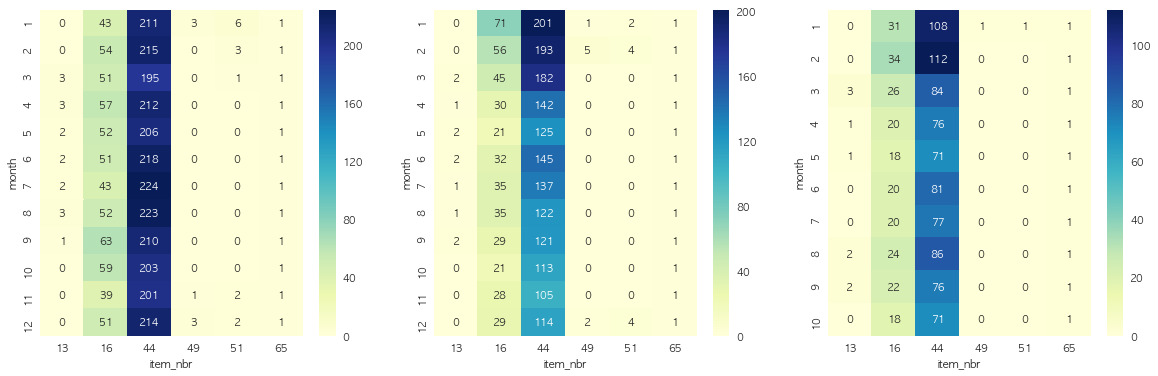

In [30]:
station_19 = tmp_df[tmp_df['station_nbr'].isin([19])]

station_19_2012 = station_19[station_19['year'].isin([2012])].reset_index(drop = True)
station_19_2013 = station_19[station_19['year'].isin([2013])].reset_index(drop = True)
station_19_2014 = station_19[station_19['year'].isin([2014])].reset_index(drop = True)

tmp_pivot_2012 = station_19_2012.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2013 = station_19_2013.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2014 = station_19_2014.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)

print(station_19['store_nbr'].unique())
plt.figure(figsize = (20,6))
plt.subplot(131)
sns.heatmap(tmp_pivot_2012, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(132)
sns.heatmap(tmp_pivot_2013, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(133)
sns.heatmap(tmp_pivot_2014, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.show()

# about station_20 - store_nbr 17

[17]


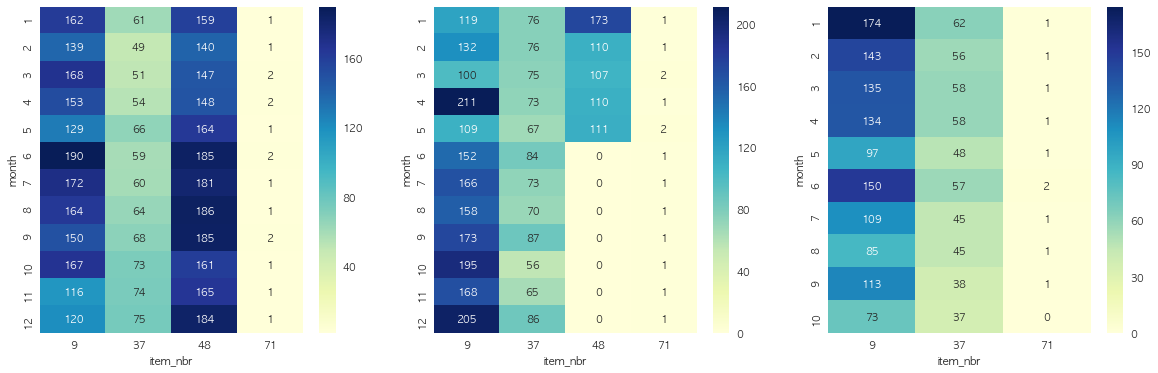

In [31]:
station_20 = tmp_df[tmp_df['station_nbr'].isin([20])]

station_20_2012 = station_20[station_20['year'].isin([2012])].reset_index(drop = True)
station_20_2013 = station_20[station_20['year'].isin([2013])].reset_index(drop = True)
station_20_2014 = station_20[station_20['year'].isin([2014])].reset_index(drop = True)

tmp_pivot_2012 = station_20_2012.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2013 = station_20_2013.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)
tmp_pivot_2014 = station_20_2014.pivot_table(values = 'units', index = ['month'], columns=['item_nbr']).fillna(value = 0).astype(int)

print(station_20['store_nbr'].unique())
plt.figure(figsize = (20,6))
plt.subplot(131)
sns.heatmap(tmp_pivot_2012, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(132)
sns.heatmap(tmp_pivot_2013, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(133)
sns.heatmap(tmp_pivot_2014, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.show()

# 관측소를 기준으로 했을 때 속하는 store_nbr 들이 상당히 비슷한 추세의 판매 경향을 보이고 있음을 알 수 있다
# 추가적으로 codesum에 따른 아이템의 판매 경향도 비교할 수 있을 듯 하다.

# 간단하게 store_nbr을 기준으로 몇가지 해본 결과
# store_nbr = 1 인 정보

In [32]:
store_1 = tmp_df[tmp_df['store_nbr'].isin([1])]

In [33]:
store_1.tail()

,date,station_nbr,store_nbr,item_nbr,units,depart,codesum,year,month,day
118468,2014-10-30,1,1,47,4,M,,2014,10,30
118577,2014-10-31,1,1,9,28,M,,2014,10,31
118578,2014-10-31,1,1,28,4,M,,2014,10,31
118579,2014-10-31,1,1,47,1,M,,2014,10,31
118580,2014-10-31,1,1,51,3,M,,2014,10,31


In [34]:
store_1_2012 = store_1[store_1['year'].isin([2012])].reset_index(drop = True)
store_1_2013 = store_1[store_1['year'].isin([2013])].reset_index(drop = True)
store_1_2014 = store_1[store_1['year'].isin([2014])].reset_index(drop = True)

In [35]:
store_1_2012.tail()

,date,station_nbr,store_nbr,item_nbr,units,depart,codesum,year,month,day
1086,2012-12-31,1,1,9,36,M,,2012,12,31
1087,2012-12-31,1,1,28,5,M,,2012,12,31
1088,2012-12-31,1,1,40,2,M,,2012,12,31
1089,2012-12-31,1,1,51,1,M,,2012,12,31
1090,2012-12-31,1,1,93,1,M,,2012,12,31


In [36]:
tmp_pivot_2012 = store_1_2012.pivot_table(values = 'units', index = ['month'], columns=['item_nbr'], aggfunc = np.sum).fillna(value = 0).astype(int)
tmp_pivot_2013 = store_1_2013.pivot_table(values = 'units', index = ['month'], columns=['item_nbr'], aggfunc = np.sum).fillna(value = 0).astype(int)
tmp_pivot_2014 = store_1_2014.pivot_table(values = 'units', index = ['month'], columns=['item_nbr'], aggfunc = np.sum).fillna(value = 0).astype(int)

## store_1 은 전 년도에 9번 item에 대한 항목이 꾸준히 가장 많이 팔린 것을 알 수 있습니다. 
## 2013년에는 47번 item항목이 추가적으로 팔린 것으로 확인 되고, 2014년에는 89번과 93번 item이 더이상 팔리지 않은 것을 알 수 있습니다.

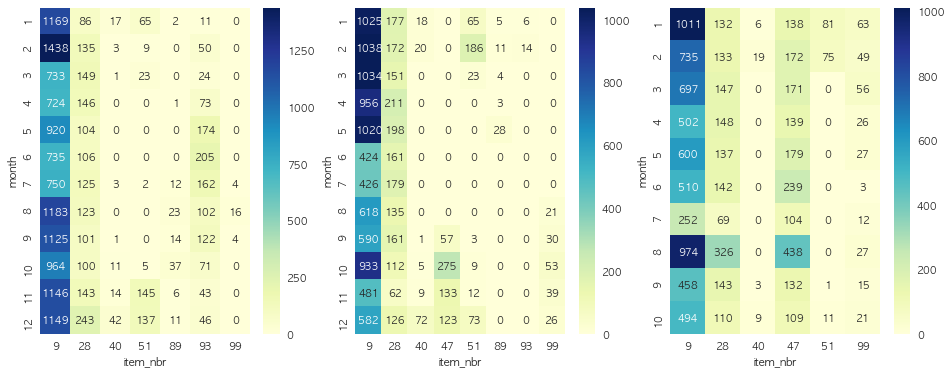

In [37]:
plt.figure(figsize = (16,6))
plt.subplot(131)
sns.heatmap(tmp_pivot_2012, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(132)
sns.heatmap(tmp_pivot_2013, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(133)
sns.heatmap(tmp_pivot_2014, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.show()

# store_nbr = 2 

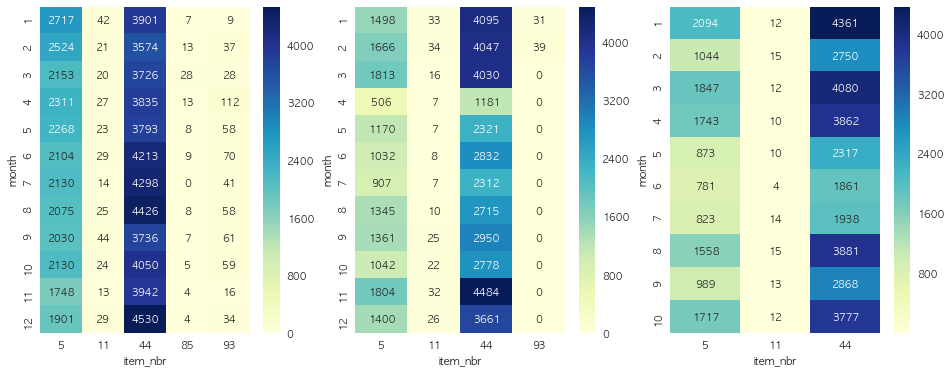

In [38]:
store_2 = tmp_df[tmp_df['store_nbr'].isin([2])]

store_2_2012 = store_2[store_2['year'].isin([2012])].reset_index(drop = True)
store_2_2013 = store_2[store_2['year'].isin([2013])].reset_index(drop = True)
store_2_2014 = store_2[store_2['year'].isin([2014])].reset_index(drop = True)

tmp_pivot_2012 = store_2_2012.pivot_table(values = 'units', index = ['month'], columns=['item_nbr'], aggfunc = np.sum).fillna(value = 0).astype(int)
tmp_pivot_2013 = store_2_2013.pivot_table(values = 'units', index = ['month'], columns=['item_nbr'], aggfunc = np.sum).fillna(value = 0).astype(int)
tmp_pivot_2014 = store_2_2014.pivot_table(values = 'units', index = ['month'], columns=['item_nbr'], aggfunc = np.sum).fillna(value = 0).astype(int)

plt.figure(figsize = (16,6))
plt.subplot(131)
sns.heatmap(tmp_pivot_2012, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(132)
sns.heatmap(tmp_pivot_2013, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.subplot(133)
sns.heatmap(tmp_pivot_2014, cmap="YlGnBu", annot = True, fmt = '.0f')
plt.show()